In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#Importing the data to use
file=open("./ObesityDataSet_raw_and_data_sinthetic.csv")
data_raw=file.read().split("\n")
data_list=[]
for row in data_raw:
    data_list.append(row.split(","))
data=pd.DataFrame(data_list[1:-1])
data.columns=data_list[0]
print(data.head(5))
file.close()

   Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP  \
0  Female  21   1.62     64                            yes   no    2   3   
1  Female  21   1.52     56                            yes   no    3   3   
2    Male  23    1.8     77                            yes   no    2   3   
3    Male  27    1.8     87                             no   no    3   3   
4    Male  22   1.78   89.8                             no   no    2   1   

        CAEC SMOKE CH2O  SCC FAF TUE        CALC                 MTRANS  \
0  Sometimes    no    2   no   0   1          no  Public_Transportation   
1  Sometimes   yes    3  yes   3   0   Sometimes  Public_Transportation   
2  Sometimes    no    2   no   2   1  Frequently  Public_Transportation   
3  Sometimes    no    2   no   2   0  Frequently                Walking   
4  Sometimes    no    2   no   0   0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

In [5]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
data.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

In [7]:
data2=pd.read_csv("./ObesityDataSet_raw_and_data_sinthetic.csv")
data2.isnull().any()
data2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,1402,1574,1525,2,2,810,635,4,2,1268,2,1190,1129,4,5,7
top,Male,18,1.7,80,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,128,60,59,1726,1866,652,1203,1765,2067,448,2015,411,557,1401,1580,351


## First glance
The data has no null value, which makes it easier to interpret.

However, NObeyesdad is defined using Height and Weight (as is said in the data description).

According to me, it would not be interesting to use the height and the weight for our AI, since it would just be a basic calculation. Indeed, we already know, since it is in the source article, that the formula used is weight/(height^2). Then according to the result, the person is placed in a group or another.

Therefore, i plan on using an AI attempting to find the correct result using all the data, and then, another one not knowing the height and weight of the individual. 

## Second glance

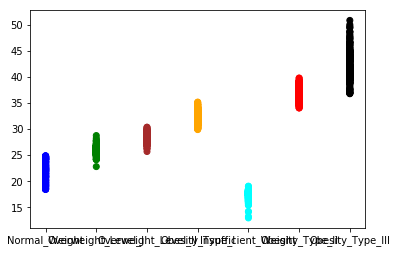

In [9]:
colors=["blue","green","brown","orange","cyan","red","black"]
colorsData={data.NObeyesdad.unique()[i]:colors[i] for i in range(len(colors))}
colors=[]
for i in data.NObeyesdad:
    colors.append(colorsData[i])
classifications=[]
for i in data.NObeyesdad:
    classifications.append(i)

heights12=[]
for height in data.Height:
    heights12.append(1/float(height)**2)
weights=[]
for weight in data.Weight:
    weights.append(float(weight))
results=[]
for i in range(len(heights12)):
    results.append(heights12[i]*weights[i])
plt.scatter(classifications,results,c=colors)
#plt.savefig("graphTrue")
plt.show()

This plot seems to confirm that the weights and the heights are sufficients in determining the level of obesity of a person, as expected, since this result is based on a calculation from these two variables.

However, there are some stranger cases. These must have been created artificially, as indicated in the article. Indeed, for example, all those in the Obesity type III category are supposed to have an index higher than 40, while here, it is not the case.

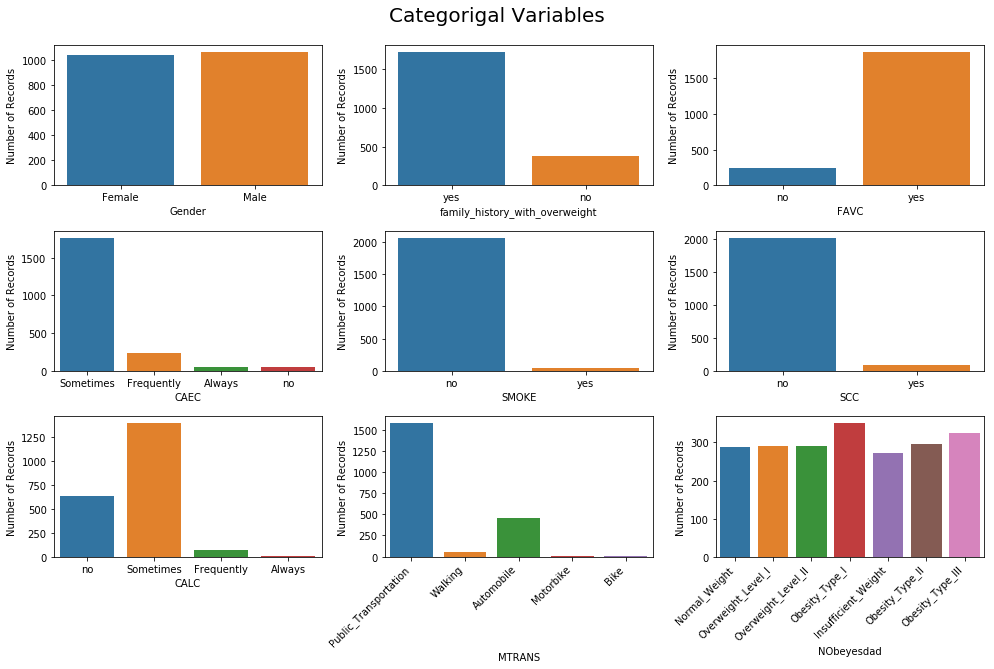

In [10]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(data[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=data.MTRANS.unique())        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(data[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=data.NObeyesdad.unique())  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(data[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

We can see that the weights and genders are the only datas spread quite evenly.
We can also notice that most users have history with overweight in their family, are non-smokers, who drink alcohol from time to time, use mostly public transportation, do not smoke, do not monitor what they eat, and eat in between two meals from time to time.

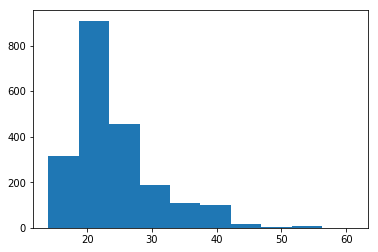

In [11]:
plt.hist(data2.Age)
plt.show()

The data coming from the internet, it is normal to see mainly people around the age of 20 to answer to such a survey.

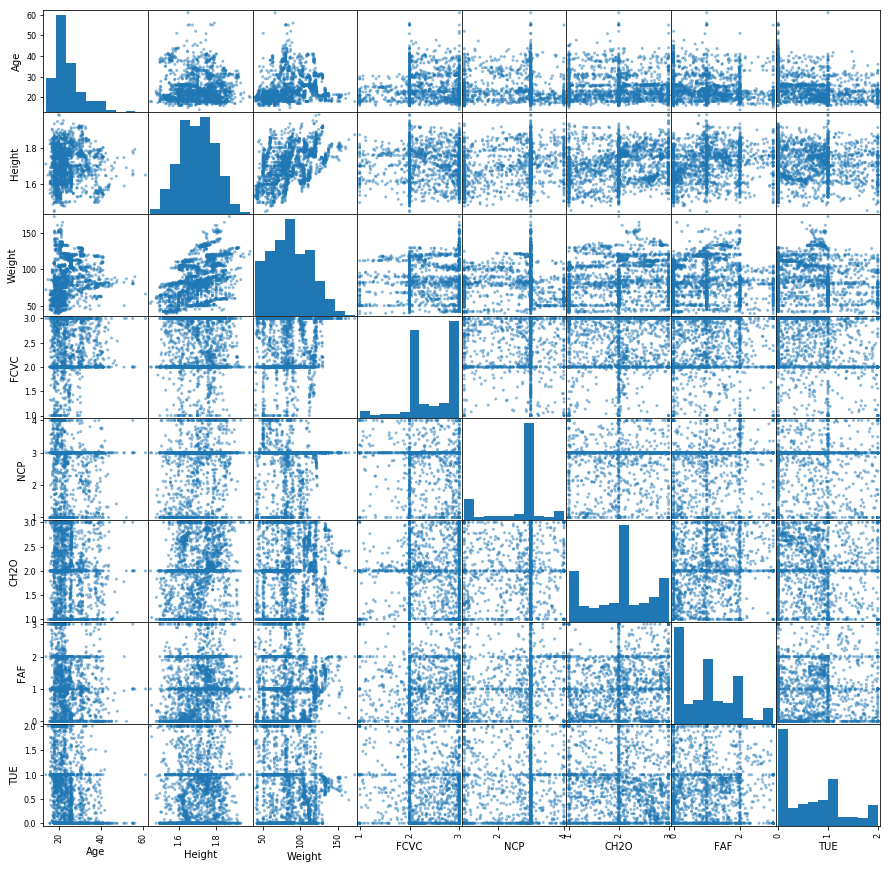

In [12]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data2,figsize=(15,15))
plt.show()

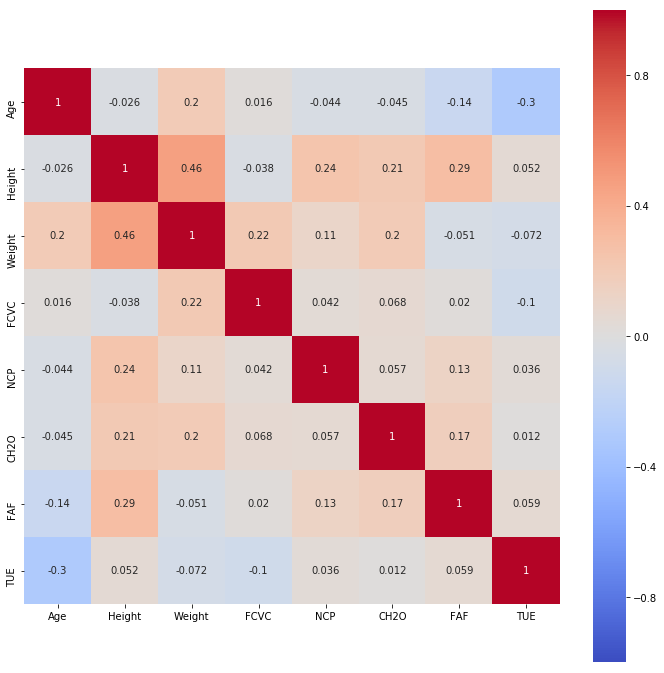

In [13]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr("pearson"),cmap="coolwarm",vmin=-1,vmax=1,square=True,annot=True)

The numerical data doesn't seem to be really correlated, as seen with the heatmap, except for age and technology usage, which seem to be slightly negatively correlated.

However, the scatter matrix is reinforcing the idea that the data is split into several groups, with some points forming clear demarcations. This is reinforcing the idea that a method such as random forest, or decision tree is the AI of choice for this dataset, while Knn might be lost due to the seeming randomness of most datapoints.

## Preparing the data


In [14]:
#Removing the height and weight columns
data2=data2.drop(columns=['Height','Weight'])

columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
#Making the "strings" columns into 
for col in columns:
    data2[col] = data2[col].astype('category')

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
Gender                            2111 non-null category
Age                               2111 non-null float64
family_history_with_overweight    2111 non-null category
FAVC                              2111 non-null category
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2111 non-null category
SMOKE                             2111 non-null category
CH2O                              2111 non-null float64
SCC                               2111 non-null category
FAF                               2111 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null category
MTRANS                            2111 non-null category
NObeyesdad                        2111 non-null category
dtypes: category(9), float64(6)
memory usage

## Testing some AIs

We will test the 2 main AI models for classification : The random forest and the knn algorithms. These two models are designed with two different approaches :

- Random forest is an extension of decision trees, in which the program splits the data into several sub-groups, according to a binary tree. A random forest is simply an ensemble of trees, to remove the randomness of the model.
- Knn's approach is to separate the datapoints into groups depending on how close they are from one another.

Their main difference is the fact that random forests is supervised, meaning it needs to know the results of each datapoint, while knn doesn't, since it is unsupervised.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfClass=RandomForestClassifier(random_state=2021)
knnClass=KNeighborsClassifier()
data2_prep=data2.copy()
data2_prep = pd.get_dummies(data2_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#We split the data into training set and test set
dataUnknown=pd.concat([data2_prep.loc[:, data2_prep.columns != 'NObeyesdad']])
dataTrain=dataUnknown[:1600]
resultTrain=data2.NObeyesdad[:1600]

dataTest=dataUnknown[1600:]
resultTest=data2.NObeyesdad[1600:]

standardScale=StandardScaler()
dataTrainScaled=standardScale.fit_transform(dataTrain)
dataTestScaled=standardScale.transform(dataTest)

fullResult=data2.NObeyesdad

print("------ Unscaled Random Forest -------")
modelUnscaled1=rfClass.fit(dataTrain,resultTrain)
predictedResults1=modelUnscaled1.predict(dataTest)
errors=[]
accuracy = round(metrics.accuracy_score(predictedResults1, resultTest),5)
for i in range(0,len(resultTest)):
    errors.append(predictedResults1[i]!=resultTest[i+1600])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy (two methods used)")
print(1-sum(errors)/len(errors))
print(accuracy)

print("------ Scaled Random Forest -------")
modelScaled1=rfClass.fit(dataTrainScaled,resultTrain)
predictedResultsScaled1=modelScaled1.predict(dataTestScaled)
errors=[]
for i in range(0,len(resultTest)):
    errors.append(predictedResultsScaled1[i]!=resultTest[i+1600])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy (one method used)")
print(1-sum(errors)/len(errors))


print("------ Unscaled knn -------")
modelUnscaled1=knnClass.fit(dataTrain,resultTrain)
predictedResults1=modelUnscaled1.predict(dataTest)
errors=[]
accuracy = round(metrics.accuracy_score(predictedResults1, resultTest),5)
for i in range(0,len(resultTest)):
    errors.append(predictedResults1[i]!=resultTest[i+1600])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy (two methods used)")
print(1-sum(errors)/len(errors))
print(accuracy)

print("------ Scaled knn -------")
modelScaled1=knnClass.fit(dataTrainScaled,resultTrain)
predictedResultsScaled1=modelScaled1.predict(dataTestScaled)
errors=[]
for i in range(0,len(resultTest)):
    errors.append(predictedResultsScaled1[i]!=resultTest[i+1600])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy (one method used)")
print(1-sum(errors)/len(errors))




------ Unscaled Random Forest -------
Total number of errors : 
22
Total number of cases tested : 
511
Accuracy (two methods used)
0.9569471624266145
0.95695
------ Scaled Random Forest -------
Total number of errors : 
22
Total number of cases tested : 
511
Accuracy (one method used)
0.9569471624266145
------ Unscaled knn -------
Total number of errors : 
164
Total number of cases tested : 
511
Accuracy (two methods used)
0.6790606653620352
0.67906
------ Scaled knn -------
Total number of errors : 
113
Total number of cases tested : 
511
Accuracy (one method used)
0.7788649706457926


C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Corentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It is noticeable that the data doesn't need to be scaled for randomForest, while it is needed for knn to have better results.

We can also notice that random forest is just plain better than knn for this sample. I will assume that it is the better model, to use in general, is random forest, for this problem. After all, the results are true 95.7% of the time if we use random forest, compared to knn's quite good 77.9%.

## AI choice

The task here is about finding to which of the categories a given person belongs, without taking height or weight into account. Since there are 6/7 categories, the best methods seem to be random forest.

In [12]:

#Used when called in the main program
fullModel1=rfClass.fit(dataUnknown,fullResult)
def applyModel1(person):
    data3=pd.concat([data2.loc[:, data2.columns != 'NObeyesdad']])
    data3=pd.concat([data3,person],ignore_index=True)
    columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
    for col in columns:
        data3[col] = data3[col].astype('category')
    data3 = pd.get_dummies(data3,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
    #print(data3.iloc[-2:])
    return fullModel1.predict(data3.iloc[-2:])[-1]

Total number of errors : 
22
Total number of cases tested : 
511
Accuracy (two methods used)
0.9569471624266145
0.95695
Total number of errors : 
22
Total number of cases tested : 
511
Accuracy (one method used)
0.9569471624266145


C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Corentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Second Version

This time, we will have the same possible outcomes as in the article, determined using the formula BMI=weight/height^2.

Though, since it is technically a new dataset, it is advisable to try again with the two different AI models. 

In [18]:
def resultMBI(MBI):
	if MBI<18.5:
		return "Underweight"
	elif MBI<25:
		return "Normal weight"
	elif MBI<30:
		return "Overweight"
	elif MBI<35:
		return "Obese level 1"
	elif MBI<40:
		return "Obese level 2"
	else:
		return "Obese level 3"

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
rfClass=RandomForestClassifier(random_state=2021)
data2_prep=data2.copy()
data2_prep = pd.get_dummies(data2_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#We split the data into training set and test set
dataUnknown=pd.concat([data2_prep.loc[:, data2_prep.columns != 'NObeyesdad']])
dataTrain=dataUnknown[:1600]
resultTrain=[resultMBI(float(data.Weight[i])/(float(data.Height[i])**2)) for i in range(0,1600)]

dataTest=dataUnknown[1600:]
resultTest=[resultMBI(float(data.Weight[i])/(float(data.Height[i])**2)) for i in range(1600,len(data.Height))]

fullResult=[resultMBI(float(data.Weight[i])/(float(data.Height[i])**2)) for i in range(0,len(data.Height))]


print("------ Random Forest -------")
modelUnscaled2=rfClass.fit(dataTrain,resultTrain)
predictedResults2=modelUnscaled2.predict(dataTest)
errors=[]
for i in range(0,len(resultTest)):
    errors.append(predictedResults2[i]!=resultTest[i])
#print(errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy")
print(1-sum(errors)/len(errors))


print("------ Unscaled knn -------")
modelUnscaled2=knnClass.fit(dataTrain,resultTrain)
predictedResults2=modelUnscaled2.predict(dataTest)
errors=[]
for i in range(0,len(resultTest)):
    errors.append(predictedResults2[i]!=resultTest[i])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy ")
print(1-sum(errors)/len(errors))

print("------ Scaled knn -------")
modelScaled2=knnClass.fit(dataTrainScaled,resultTrain)
predictedResultsScaled2=modelScaled2.predict(dataTestScaled)
errors=[]
for i in range(0,len(resultTest)):
    errors.append(predictedResultsScaled2[i]!=resultTest[i])
#print("list of results being errors (false means the result is correct) ",errors)
print("Total number of errors : ")
print(sum(errors))
print("Total number of cases tested : ")
print(len(errors))
print("Accuracy")
print(1-sum(errors)/len(errors))


#Used when called in the main program
fullModel2=rfClass.fit(dataUnknown,fullResult)
def applyModel2(person):
    data3=pd.concat([data2.loc[:, data2.columns != 'NObeyesdad']])
    data3=pd.concat([data3,person],ignore_index=True)
    columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
    for col in columns:
        data3[col] = data3[col].astype('category')
    data3 = pd.get_dummies(data3,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
    #print(data3.iloc[-1])
    return fullModel2.predict(data3.iloc[-2:])[1]

------ Random Forest -------
Total number of errors : 
143
Total number of cases tested : 
511
Accuracy
0.7201565557729941
------ Unscaled knn -------
Total number of errors : 
239
Total number of cases tested : 
511
Accuracy 
0.5322896281800391
------ Scaled knn -------
Total number of errors : 
167
Total number of cases tested : 
511
Accuracy
0.6731898238747553


C:\Users\Corentin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


These models are seemingly less effective (72% right rather than 95%, and 67% rather than 78%, respectively).

These models are still quite good, and we will still use random forest for this problem.

In [129]:
#print(data2_prep.loc[0])
#print("-----------------------------------------")
#data2
#data2.FCVC.unique()[:6]
#person=pd.DataFrame([["Male",19,"yes","yes",1,1,"no","no",3,"no",0,1,"no","Automobile"]],columns=["Gender","Age","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"])
#print(applyModel2(person))

Age                                   19.0
FCVC                                   1.0
NCP                                    1.0
CH2O                                   3.0
FAF                                    0.0
TUE                                    1.0
Gender_Female                          0.0
Gender_Male                            1.0
family_history_with_overweight_no      0.0
family_history_with_overweight_yes     1.0
FAVC_no                                0.0
FAVC_yes                               1.0
CAEC_Always                            0.0
CAEC_Frequently                        0.0
CAEC_Sometimes                         0.0
CAEC_no                                1.0
SMOKE_no                               1.0
SMOKE_yes                              0.0
SCC_no                                 1.0
SCC_yes                                0.0
CALC_Always                            0.0
CALC_Frequently                        0.0
CALC_Sometimes                         0.0
CALC_no    

'Overweight'

In [116]:
data2.iloc[-2:]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [53]:
pd.get_dummies(data2,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]).head(10)

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,1,1,...,0,0,0,1,0,0,0,0,1,0
5,29.0,2.0,3.0,2.0,0.0,0.0,Normal_Weight,0,1,1,...,0,0,0,1,0,1,0,0,0,0
6,23.0,3.0,3.0,2.0,1.0,0.0,Normal_Weight,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,22.0,2.0,3.0,2.0,3.0,0.0,Normal_Weight,0,1,1,...,0,0,0,1,0,0,0,0,1,0
8,24.0,3.0,3.0,2.0,1.0,1.0,Normal_Weight,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9,22.0,2.0,3.0,2.0,1.0,1.0,Normal_Weight,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
data2.head(10)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
